In [27]:
### Load packages ###
import matplotlib.pyplot as plt
from scipy import stats
import nibabel as nib
import numpy as np
import os

### Aux. Functions ###
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

def thresholdMask(mask, threshold=0.56):
    mask[mask >= threshold] = 1.0
    mask[mask < threshold] = 0.0
    return mask

def padImage(img, mask=False):
    '''
    1) Find max dim. value and idx
    2) Check if autre dim. == to max dim
    3) True -> return orig. image
    4) False -> pad dims. != argmax(dims)
    5) Return padded image
    ''' 
    img_c = img.copy()
    # Get max dim
    dims = img.shape
    max_dim = max(dims)
    # Padding Args.
    pad_value = 0
    pad_arr = [(0,0), (0,0), (0,0)]
    # Check if mask or input to pad w. 1 or 0
    if mask:
        pad_value = 1
    # Check if other dims eq. largest dim
    for idx, dim in enumerate(dims):
        if dim != max_dim:
            pad_w = max_dim - dim
            pad_arr[idx] = (pad_w//2, pad_w//2)
            img_c = np.pad(img, pad_arr,
                            mode='constant', constant_values=(pad_value))

    return img_c


%matplotlib inline





In [33]:
### Load Data ###
# nii files
norm_img_nii = nib.load('../data/IXI371-IOP-0970-T1.nii')
def_img_nii = nib.load('../data/IXI371-IOP-0970-T1_defaced.nii')
mask_img_nii = nib.load('../data/IXI371-IOP-0970-T1_mask.nii.gz')
# img data
norm_img = norm_img_nii.get_data()
def_img = def_img_nii.get_data()
mask_img = mask_img_nii.get_data()

### Data Size ###
print('Norm. Vol. :\n', norm_img.shape)
print()
print('Def. Vol. :\n', def_img.shape)
print()
print('Mask Vol. :\n', mask_img.shape)


Norm. Vol. :
 (256, 256, 146)

Def. Vol. :
 (256, 256, 146)

Mask Vol. :
 (256, 256, 146)


In [37]:
### Create Padded Versions ###
norm_img_p = padImage(normalizeImg(norm_img), mask=False)
print('Norm. Vol. :\n', norm_img_p.shape)
print()

mask_img_p = padImage(mask_img, mask=True)
print('Mask Vol. :\n', mask_img_p.shape)
print()

def_img_p = padImage(def_img, mask=False)
print('def. Vol. :\n', def_img_p.shape)
print()

Norm. Vol. :
 (256, 256, 256)

Mask Vol. :
 (256, 256, 256)

def. Vol. :
 (256, 256, 256)



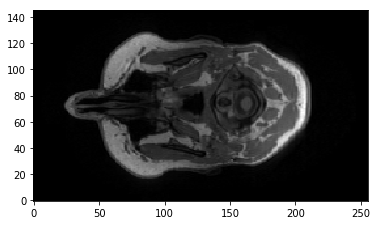

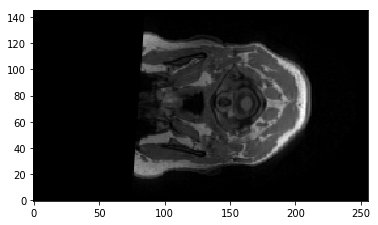

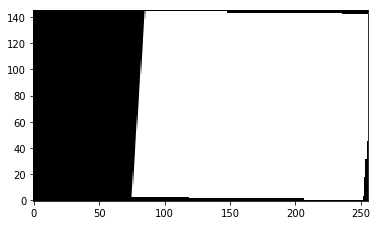

In [35]:
### Show corresponding slices ###
norm_slice = norm_img[:, 75, :]
def_slice = def_img[:, 75, :]
mask_slice = mask_img[:, 75, :]

show_slice(norm_slice)
plt.show()
show_slice(def_slice)
plt.show()
show_slice(mask_slice)
plt.show()

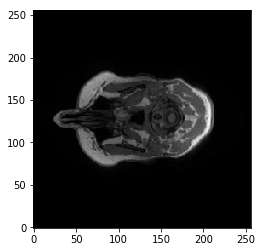

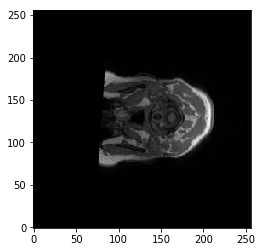

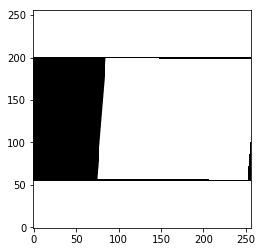

In [36]:
### Show corresponding padded slices ###
norm_slice = norm_img_p[:, 75, :]
def_slice = def_img_p[:, 75, :]
mask_slice = mask_img_p[:, 75, :]

show_slice(norm_slice)
plt.show()
show_slice(def_slice)
plt.show()
show_slice(mask_slice)
plt.show()

In [31]:
### Data Stats. ###
print('### Norm. Vol. :\n', stats.describe(norm_img, axis=None))
print()
print('### Def. Vol. :\n', stats.describe(def_img, axis=None))
print()
print('### Mask Vol. :\n',stats.describe(mask_img, axis=None))

### Norm. Vol. :
 DescribeResult(nobs=9830400, minmax=(0, 1068), mean=105.87923960367839, variance=27339.047981425392, skewness=1.3435070240881604, kurtosis=0.5705360358377836)

### Def. Vol. :
 DescribeResult(nobs=9830400, minmax=(0.0, 1068.0000607855618), mean=96.80267134371795, variance=25698.53975083795, skewness=1.4557747800552148, kurtosis=0.8811058960265847)

### Mask Vol. :
 DescribeResult(nobs=9830400, minmax=(0.0, 1.0), mean=0.8313851494809853, variance=0.13970232572609326, skewness=-1.7702029257462208, kurtosis=1.1384420878912769)


In [32]:
### Data Stats. Padded ###
print('### Norm. Vol. :\n', stats.describe(norm_img_p, axis=None))
print()
print('### Def. Vol. :\n', stats.describe(def_img_p, axis=None))
print()
print('### Mask Vol. :\n',stats.describe(mask_img_p, axis=None))

### Norm. Vol. :
 DescribeResult(nobs=16777216, minmax=(0, 1068), mean=62.038616955280304, variance=18738.78450956574, skewness=2.189288290713904, kurtosis=3.7800147098987242)

### Def. Vol. :
 DescribeResult(nobs=16777216, minmax=(0.0, 1068.0000607855618), mean=56.720315240459804, variance=17331.221510282736, skewness=2.3171557233548046, kurtosis=4.378183169478337)

### Mask Vol. :
 DescribeResult(nobs=16777216, minmax=(0.0, 1.0), mean=0.9012022360240147, variance=0.08875460048118194, skewness=-2.689152182126012, kurtosis=5.238544425594839)
